# Business Understanding

Het bedrijf PerkinElmer verzameld samples van koeien om daar uit op te maken welke hoeveelheid aan lactose, eiwitten en vetten er in de melk zitten. Op deze manier kunnen ze bepalen hoeveel de boer uitbetaald moet worden gebaseerd op meestal de vetten en/of de eiwitten. 
De officiele methode is duur, kost veel tijd en is alleen specifiek voor dat component dat getest is. Kortom ze zoeken een methode die sneller is, goedkoper en het moet meerdere componenten tegelijk kunnen analyseren.
De alternatieve methode wordt gedaan door een infrarood analysis uit te voeren en zit je dus al te kijken naar het licht spectrum. Verschillende moleculen reageren daar anders op binnen de infrarood range.

### Het infrarood licht

- Near Infrared ~ 700 - 3000nm (0.7 - 3µm)
- Mid Infrared ~ 3000 - 50000nm (3 - 50µm, 3000 - 200cm-1)
- Far Infrared ~ 50000 - 100000nm (50 - 1000µm)

### Meest belangrijke areas:

- Fingerprint (Protein)	        1000 - 1585cm-1 
- C=O (Lactose)			1700 - 1700cm-1
- CH2 (vet)	            2800 - 3000cm-1

Het is aan ons als groep om een model te bedenken die de verhouding tussen vetten, eiwitten en lactose kan bepalen door gebruik te maken van de LASSO techniek.

Het lastige hieraan is dat bijvoorbeeld vet en lactose op dezelfde infrarood frequency kunnen zitten. Daar moet dus onderscheid tussen gemaakt worden. Omdat ze veel op elkaar lijken.

# Data Understanding

Om een model te bedenken hebben wij 48 samples gekregen in .spc file format. Daarin zitten nog per sample 3 replica's. Replica's is een herhaling van hetzelfde sample maar meer om te kijken of deze wel overeen komen en dus vertrouwlijk zijn voor dat sample. 
Daar zouden wij dan een gemiddelde uit kunnen gaan halen???

Daarnaast hebben wij een excel sheet gekregen met daarin de waardes voor vet, eiwitten en lactose voor elke sample. Dit zijn dus onze **Labels**

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Label Data

In [24]:
label_data = pd.read_excel (r'.\Reference values.xlsx')

<AxesSubplot:>

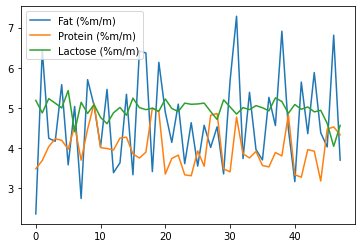

In [22]:
label_data.plot()

In [25]:
label_data.head()
print(label_data.shape)

(48, 4)


## Feature Data

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


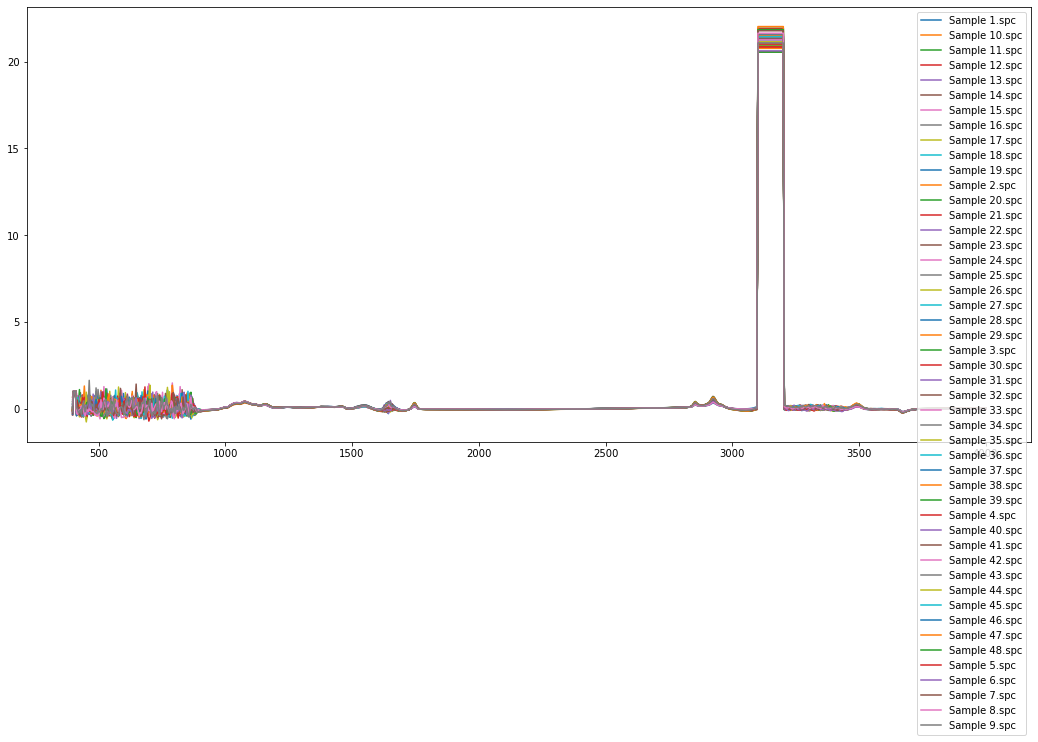

In [ ]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc=read_spc_dir('Spectra')

f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("nm")
plt.ylabel("Abs")
ax.legend(labels= list(df_spc.transpose().columns))
plt.show()

In [28]:
print(df_spc.shape)
df_spc.head()

(48, 935)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
Sample 1.spc,0.102523,1.008154,1.008154,1.008154,0.108095,0.386348,0.587932,0.636955,0.505134,0.120575,...,0.008786,0.009086,0.009137,0.008949,0.008572,0.008057,0.007464,0.006890,0.006382,0.005994
Sample 10.spc,-0.079924,1.008154,1.008154,1.008154,0.005067,-0.125471,-0.076960,0.003513,0.189936,0.184983,...,0.016217,0.016301,0.016317,0.016264,0.016161,0.016062,0.015982,0.015956,0.016003,0.016133
Sample 11.spc,-0.323271,1.008154,1.008154,1.008154,-0.067009,0.398773,0.422958,-0.073452,-0.072329,0.295611,...,0.012406,0.012486,0.012379,0.012118,0.011754,0.011350,0.010947,0.010624,0.010413,0.010328
Sample 12.spc,-0.136930,1.008154,1.008154,1.008154,-0.138287,0.183399,0.176318,0.156126,-0.348701,-0.478711,...,0.015737,0.015781,0.015683,0.015497,0.015239,0.014953,0.014692,0.014525,0.014455,0.014493
Sample 13.spc,0.125331,1.008154,1.008154,1.008154,0.475342,0.750735,0.008357,-0.252117,-0.339127,-0.228932,...,0.007578,0.007749,0.007698,0.007442,0.007046,0.006575,0.006088,0.005640,0.005292,0.005095


In [29]:
df_spc.dtypes

397.306909     float64
401.164258     float64
405.021606     float64
408.878955     float64
412.736304     float64
                ...   
3984.641138    float64
3988.498486    float64
3992.355835    float64
3996.213184    float64
4000.070532    float64
Length: 935, dtype: object

In [30]:
df_spc.dtypes.value_counts()

float64    935
dtype: int64

In [31]:
df_spc.describe()

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.019101,1.008154,1.008154,1.008154,0.045130,0.092672,0.039434,0.082148,0.076916,-0.004282,...,0.014376,0.014484,0.014439,0.014262,0.013983,0.013665,0.013361,0.013117,0.012963,0.012931
std,0.263529,0.000000,0.000000,0.000000,0.292574,0.299831,0.243963,0.309153,0.301658,0.234862,...,0.006178,0.006163,0.006176,0.006215,0.006277,0.006355,0.006453,0.006561,0.006661,0.006748
min,-0.374078,1.008154,1.008154,1.008154,-0.411707,-0.362181,-0.322525,-0.471212,-0.378885,-0.478711,...,0.005679,0.005765,0.005697,0.005502,0.005196,0.004851,0.004517,0.004238,0.004064,0.004033
25%,-0.148084,1.008154,1.008154,1.008154,-0.181972,-0.126833,-0.150936,-0.127969,-0.133574,-0.181997,...,0.009990,0.010106,0.010031,0.009787,0.009402,0.008964,0.008552,0.008189,0.007926,0.007807
50%,-0.060777,1.008154,1.008154,1.008154,0.017970,0.001754,0.002790,0.066113,0.026855,-0.047493,...,0.012522,0.012608,0.012591,0.012422,0.012126,0.011816,0.011566,0.011209,0.010951,0.010839
75%,0.150368,1.008154,1.008154,1.008154,0.206894,0.385710,0.159366,0.244046,0.289392,0.152255,...,0.016332,0.016427,0.016421,0.016320,0.016130,0.015992,0.015915,0.015909,0.015983,0.016084
max,0.691449,1.008154,1.008154,1.008154,0.888871,0.750735,0.716278,1.104684,0.923787,0.643752,...,0.032885,0.032944,0.032911,0.032801,0.032630,0.032445,0.032323,0.032285,0.032303,0.032418
